In [1]:
%load_ext autoreload
%autoreload 2

import os 
import numpy as np
from matplotlib import pyplot as plt

# pySurf - a Python library for analysis of surface data


# Outline


* Surface Metrology and AFM
* What is pySurf, and why you need it
* Some examples

## Surface Metrology Data for AFM and everybody else

In [191]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "theme": "sky",
        "transition": "slide",
        "start_slideshow_at": "selected",
        "width": "90%",
        "display": "inline-block",
        "font-size": "0.6em",
        "line-height": "1.2em",
        "vertical-align": "top",
        "header": "<h3>HNSFE 2020 - 2020/09/25</h3>",
        "footer": "<h3>V. Cotroneo - INAF/Osservatorio Astronomico di Brera</h3>"
     }
)

{'theme': 'sky',
 'transition': 'slide',
 'start_slideshow_at': 'selected',
 'width': '90%',
 'height': '100%',
 'display': 'inline-block',
 'font-size': '0.6em',
 'line-height': '1.2em',
 'vertical-align': 'top',
 'header': '<h3>HNSFE 2020 - 2020/09/25</h3>',
 'footer': '<h3>V. Cotroneo - INAF/Osservatorio Astronomico di Brera</h3>'}

<table><tr><td width='25%'><img src='material/AFM_images/Si03a_03_0001.jpg'><td width='25%'><img src='material/AFM_images/CCIimage2.jpg'></td><td width='25%'><img src='material/AFM_images/0007_D2_shiny_covered.jpg'></td><td width='25%'><img src='material/AFM_images/CT02_0001.jpg'></td></tr></table>


AFM data are (most of the times) surface or profile data.

Surface and Profile data (I will consider them as a subset) are of general interest in almost any field of science and technology, from optics, to microscopy, to material science and biology.

Many operations are common to different disciplines and instruments.

Data represent a map over a 2D grid (or more in general a set of points in the 3D space), where elevation, intensity, or other quantities are expressed as a function of 2D position, identified on surface by its relation with coordinate axis.

<center><img src='material/AFM_images/AFM_3D.jpg' width="40%"></center>



<font size="6">A set of operations (many of which are common in different disciplines, e.g. leveling, feature recognition, profile extraction) are performed on data.</font>

<font size="6">

Furthermore:
* Automatic metrology systems can collect large sets of correlated data. 
* Several related maps (e.g. different instruments or different samplings) can be correlated. 
* There might be automation/interaction with other instruments or sensors.
    
</font>

## Common Solutions and Tools

### OEM Software

In [188]:
{'theme': 'sky',
 'transition': 'slide',
 'start_slideshow_at': 'selected',
 'width': '90%',
 'height': '100%',
 'display': 'inline-block',
 'font-size': '0.6em',
 'line-height': '1.2em',
 'vertical-align': 'top',
 'header': '<h3>HNSFE 2020 - 2020/09/25</h3>',
 'footer': '<center><h3>V. Cotroneo - INAF/Osservatorio Astronomico di Brera</h3></center>'}

{'theme': 'sky',
 'transition': 'slide',
 'start_slideshow_at': 'selected',
 'width': '90%',
 'height': '100%',
 'display': 'inline-block',
 'font-size': '0.6em',
 'line-height': '1.2em',
 'vertical-align': 'top',
 'header': '<h3>HNSFE 2020 - 2020/09/25</h3>',
 'footer': '<center><h3>V. Cotroneo - INAF/Osservatorio Astronomico di Brera</h3></center>'}

<font size="4">Usually provided with the instrument. Typically GUI-based:

* quick and easy, however can be a problem for consistency (e.g. change of color scale, different leveling procedures).
* It needs a skilled technician to manage settings, analysis and macros. Hard-to-acquire and instrument-specific skills.
* limited or no access to code to add functionalities (*)
* not scalable to large number of data (*)

(*) Many of these tools implement some form of scripting (often Python based) or macro procedures, internally (scripting engine embedded in software) or externally (access to internal functions given through APIs od DLLs).
</font>

<table width="80%"><tr><td width='30%'><img src='material/mx_software/Capture3.png'>
    </td><td width='30%'><img src='material/mx_software/4sight.jpg'></td>
    <td width='30%'><img src='material/mx_software/pygwy-simple.png'></tr></table>

<center><font size="3"> Image courtesy of Zygo (Mx), 4D Technologies (4Sight), Gwyddion. </font></center>

### Open Source Solutions

<table width="80%"><tr><td width='50%' style="text-align:left"> 
<p>Gwyddion, developed for nanometrology, and probably the most successful software of this kind, is versatile and can handle many formats of surface data. </p>

    
   
It offers open source and has some form of interfacing with python, but is still based on a very proprietary graphical interface. </td>
    
<td width='50%'><img src='material/mx_software/gwyddion-screenshot-5.png'></td></tr></table>
    





### In Academy

<table width="80%"><tr> <td width='50%'><img src='material/scientist2_slow.gif'></td>
    <td width='50%'><p>
    
Everybody writes their own software: 
    <ul style="text-align:left"><li> from scratch </li>
    <li> in their favorite language </li>
    <li> keeps it secret (writing it with no comments and possibly backwards). </li> </ul>

    
There are anyway some good solution, but quite low-level or in languages for initiated (e.g. TOPO library in IDL).</p></td>
   </tr></table>

#### The Python programming language impact on science


<p width="60%"><font size="5">
    In many fields of science, the Python programming language, with its approach aimed at reusability, inverted this tendency: in the last years, several Python packages, tools and libraries emerged and established themselves as standard tools, bringing the language to be one of the most popular in science, if not the most popular. 
</font></p>

<table><tr><td><img src='material\programming-languages-in-astronomy-master/python-vs-matlab-vs-IDL-in-astro_sm.png' width='60%'></td><td><img src='material\programming-languages-in-astronomy-master/programming_languages_used.png'  width='60%'></td></tr></table>

<center>  Use of Python in astronomy (left panel) and in data science (right panel)..</center>

The result is an enormous base of users. 

High quality libraries for practically any field of science. 

Python is likely also the most commonly used language for scripting of surface-metrology instruments proprietary software.

<img src='material\logos/logos.jpg' width='60%'>


However, to the knowledge of the author, there is not an universally recognized framework in any language and especially not in Python. 

Python has good facility to deal with multidimensional arrays, but it lack the coordination with axis (It basically treat everything as a matrix).

# PySurf

The library was created during research on X-ray mirrors (X-ray mirrors are characterized at all wavelength from AFM to LTP, meaning from 1 um to meters scan size, profile or surface). 

The pySurf library consists in a set of core routines and classes, with a quite uniform and well defined interface, which can internally handle coordinate transformations, resulting in much more intuitive operations and enabling complex actions on data compared to pure Python.

## Advantages of the approach

In [183]:
# {"backimage": "material\logos\logos.png"}

{'backimage': 'material\\logos\\logos.png'}

<p width="40%">
Python offers:
    
* Numerous facilities and tools available for software maintenance and documentation: tests, API documentation; 
* Solid development environments, debugging tools, package managers;
* Reusable code;
* Different interfaces (command line, scripts, notebooks, graphical interface or integration with existing code, interactive code to share online), making it the ideal language for an easily-maintainable general-purpose project.
* Huge amount of high-quality science libraries;
* Highly reusable code;
    
</p>


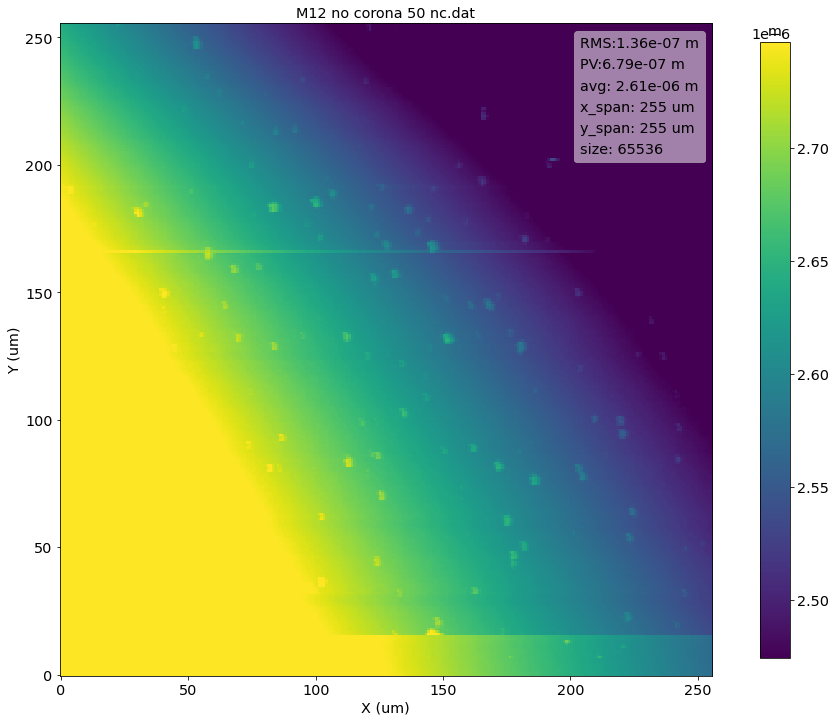

In [192]:
D.plot()

The implementation of this project in python, gives to the library the following advantages:
open source: Python programming language enable and enforces free access to source code, allowing to obtain improvement, extension and review from the community of users.
extensible: the software consists in a set of class, functions and procedures, as characteristic of Python libraries:
calls to functions and class methods can be called interactively from command line, making the library usable as a “programming language” for surface analysis.
the “language” of the previous point can be scripted or used in batch processing, allowing the realization of complex analysis scripts and data processing pipelines, with or without user interaction.
can be used in notebook interface (shown in example in fig.2), for reproducible analysis keeping track of all intermediate steps and final output that can be converted to report and/or saved as individual data and figures.
can be easily wrapped in more complex graphical interfaces or easily integrated with existing tools and code. Notably most of the OEM software for surface instruments has some extent of Python capabilities, and there are very well developed Python packages for data analysis, databases, image processing and feature recognition, that can easily be integrated with the project.
versatile and user-friendly: 
analysis of metrology data is relevant in many fields, essentially any data representable as 2D array with (or without) associated axis can find an application for some of the functions and methods in the library.
learning curve is as small as possible for who already knows Python (i.e. a constantly growing number of people in all field of science and technology), as the language offers and uniform interface and very convenient facilities for inspection of function, classes and objects API’s.
maintainable:
Python has several tools for extraction of documentation from code, tests, debug and developing environment each user can choose from (ranging from text editor and command line to complex IDE with integrated debugger and version control systems).


Use cases and applicability of the program
A generic example of use, applicable to several fields of application, can be the alignment and subtraction of two images, as shown in fig. 2 as handled by pySurf, for a case in which the alignment is interactively determined on the base of a separate set of data. The case is not trivial to handle with common software: the user needs to enter and exit several menus in the software GUI, save fiducials, retrieve them, and open and close several files. This is a set of actions that, when possible, is performed differently and with different limitations, in each software. The use of different softwares, also results in a non uniform output. 




## Structure of the library

The library is mostly made of classes, of which the most important is Data2D, representing a measured surface. 
A Data2D object p1 can be created by passing data, e.g.:  



In order to illustrate pySurf approach  and its relevance to different contexts in the field of surface data analysis, it can be useful to provide some minimal examples of its usage and syntax. The library is mostly made of classes, of which the most important is Data2D, representing a measured surface. 

A Data2D object p1 can be created by passing data, e.g.:  
    
    p1 = Data2D(data,x,y)


In [132]:
from pySurf.readers.instrumentReader import matrix_reader
from pySurf.data2D_class import Data2D

f = r'material\AFM_images\M12 no corona 50 nc.dat'

data,x,y = matrix_reader(f,delimiter='',skip_header=4)


In [193]:
D = Data2D(data,x,y,units=['um','um','m'],name=os.path.basename(f))

TypeError: 'int' object is not subscriptable

We can do a basic plot.

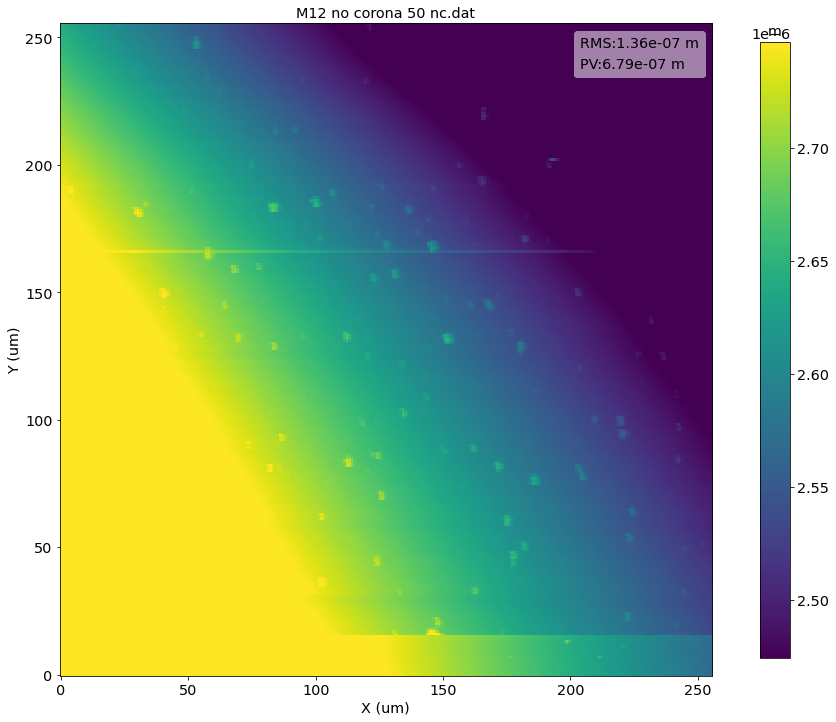

In [134]:
D.plot(stats=1)

The units are already set up. Several options are available for customization, and the plot is a Python object, modificable with usual commands. 

In [194]:
D.level?

Commmands can be chained:

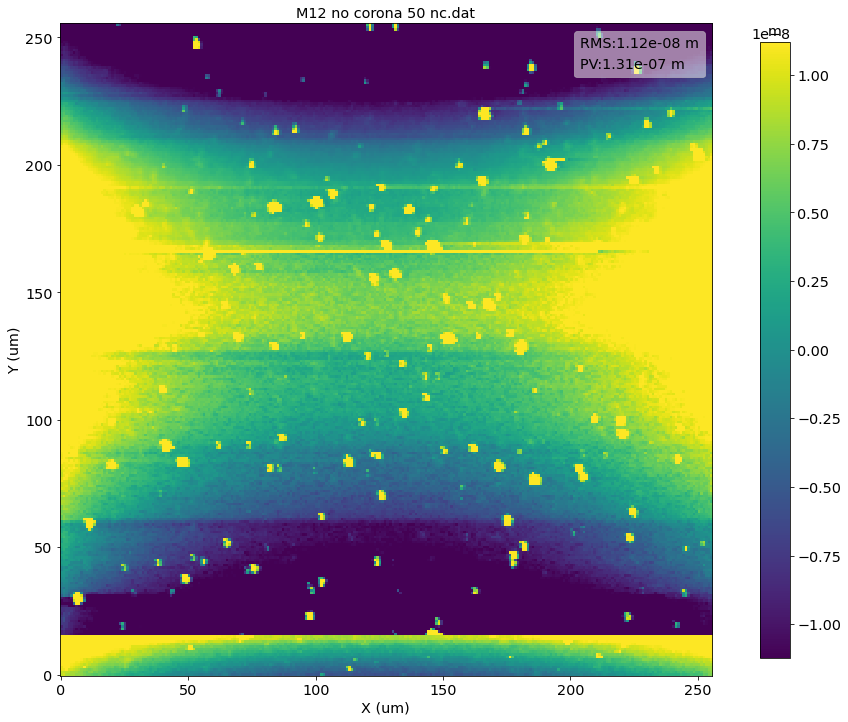

In [136]:
plt.figure(2)
D.level().plot(stats=1)

Or results assigned to variables:

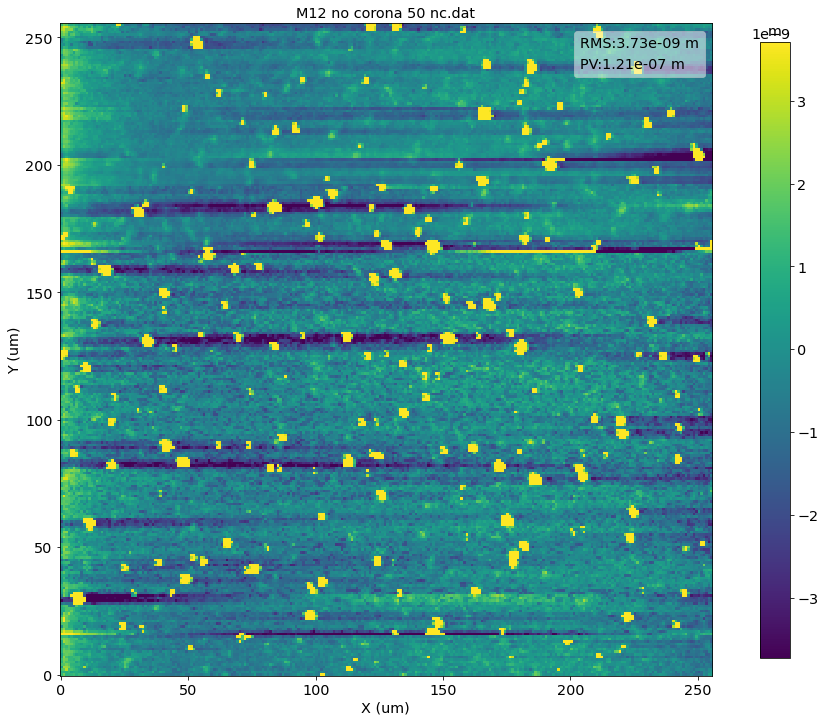

In [137]:
plt.figure(3)
Dl = D.level().level(2,axis=1)
Dl.plot(stats=1)

Statistical functions:

In [138]:
plt.hist?

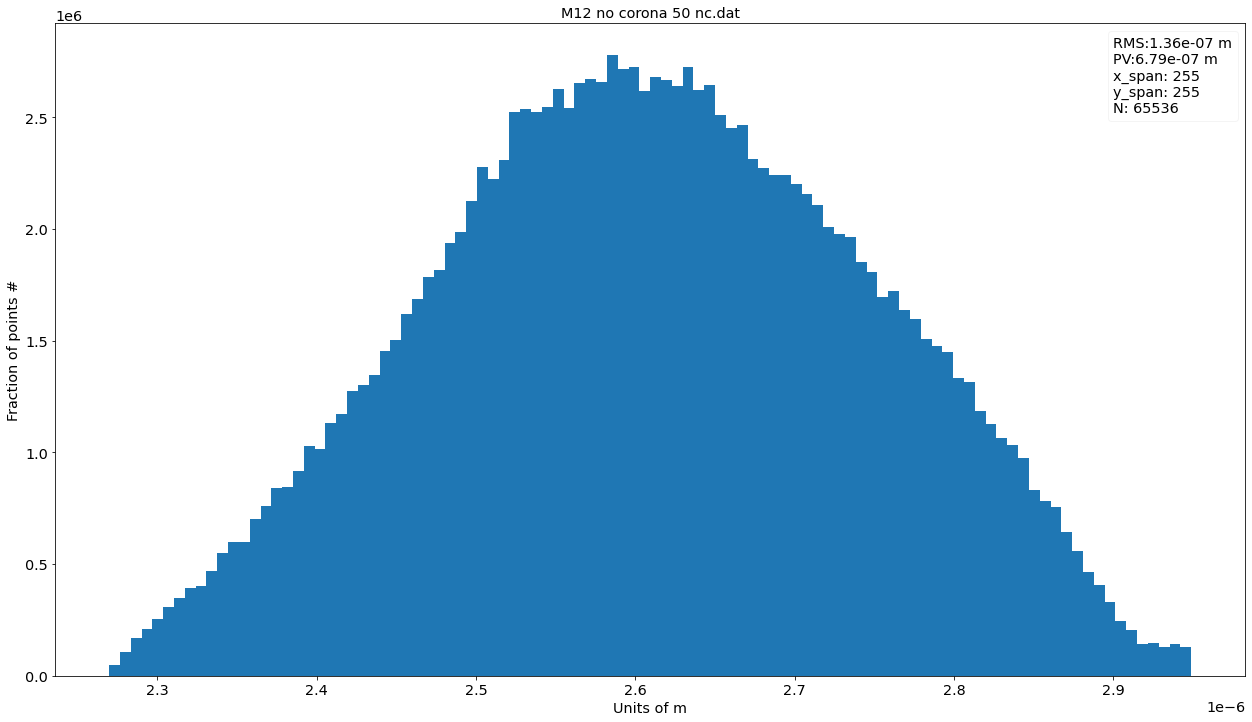

In [139]:
plt.figure('stats')
D.histostats();

Several common operations, remove outliers:

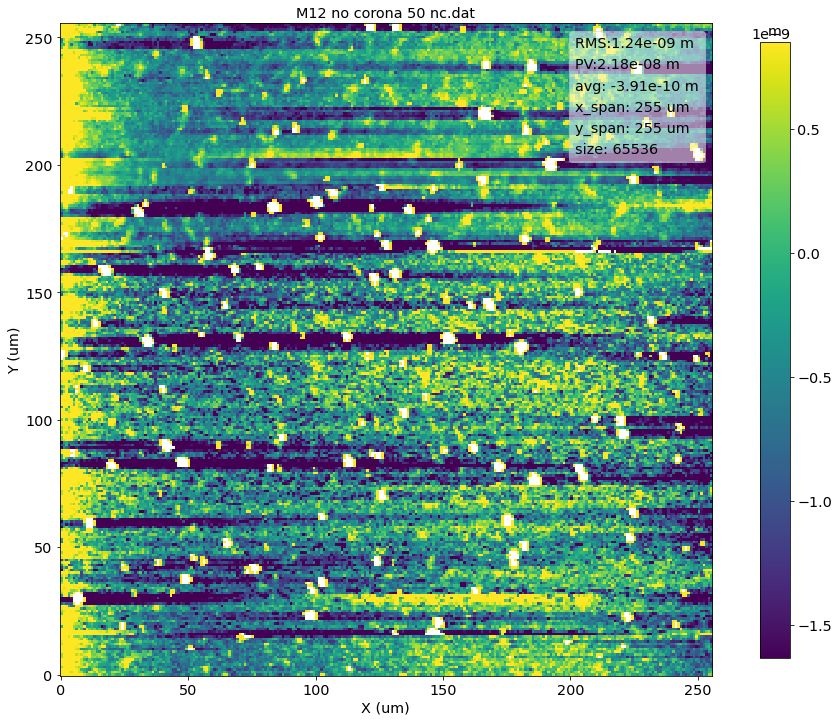

In [140]:
plt.figure()
Dl.remove_outliers(nsigma =3).plot()


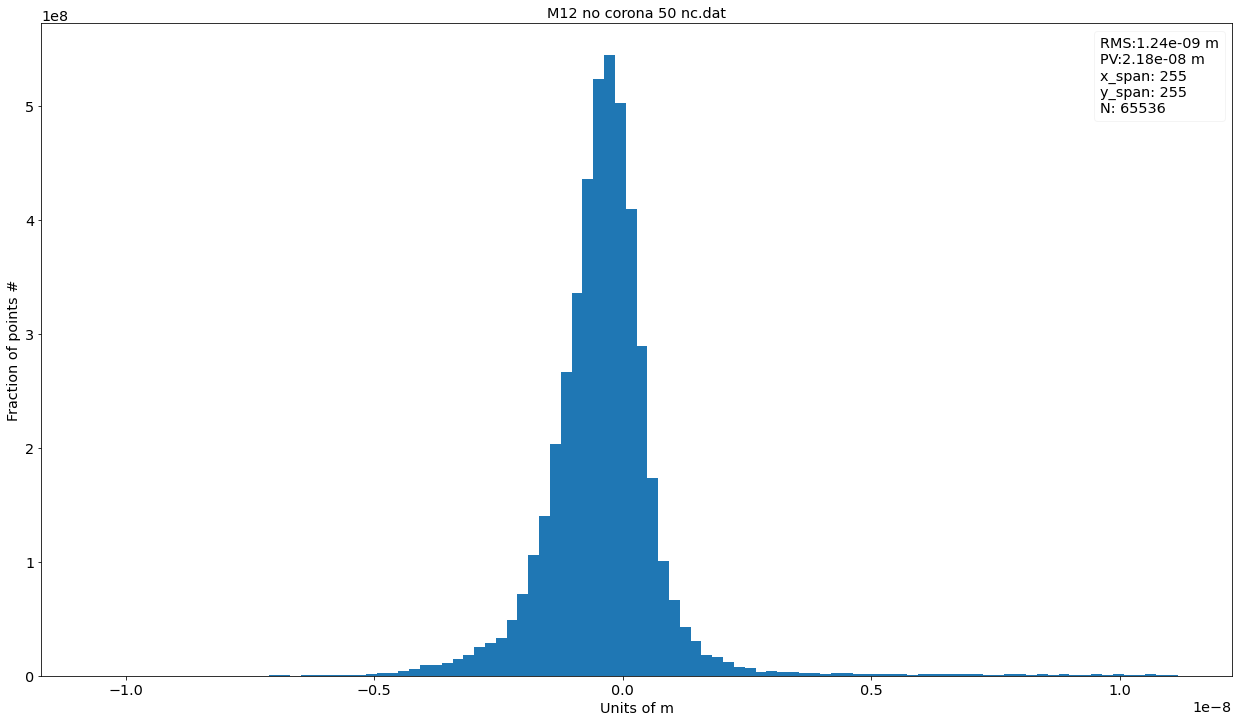

In [141]:
plt.figure('stats')
Dl.remove_outliers(nsigma =3).histostats();

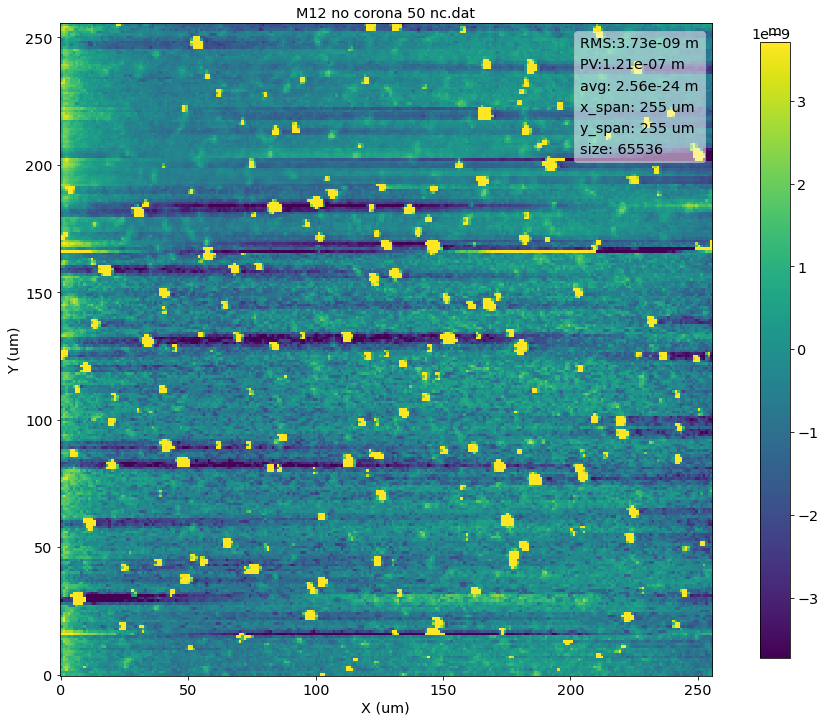

In [142]:
Dl.plot()

## Profile Extraction

In [173]:
from pyProfile.profile_class import Profile

ypos = [50,100,150,200] 

plist = []

for y in ypos:
    plist.append(Profile(*Dl.extract_profile([10,y],[240,y],along=True),name = y))

No handles with labels found to put in legend.


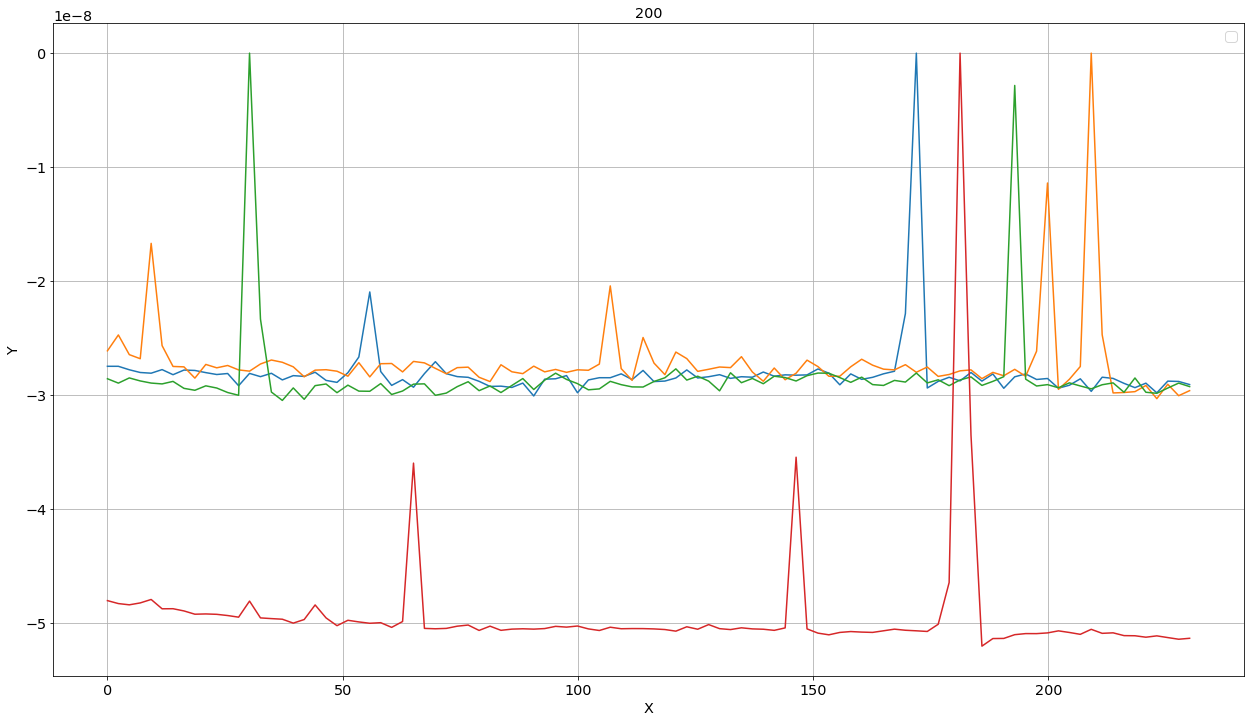

In [175]:
for pp in plist:
    pp.level(zero='top').plot()

plt.grid()
plt.legend(loc=0)

## Write complex scripts and make them available as functions

<Figure size 1536x864 with 0 Axes>

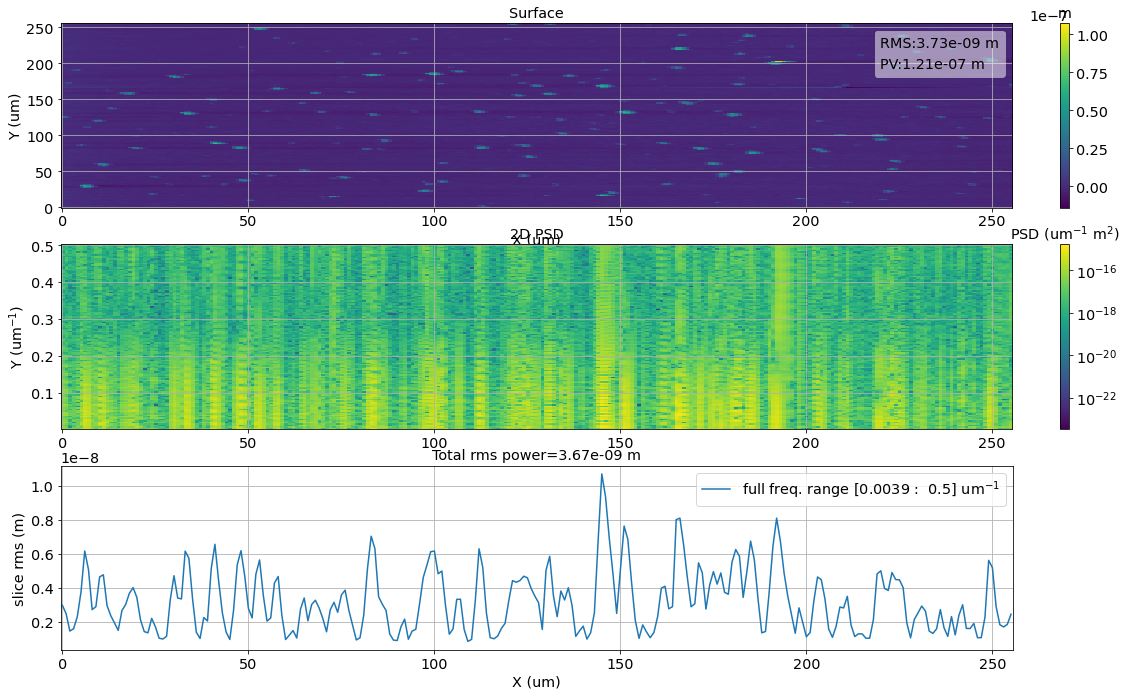

In [176]:
ps = Dl.psd(analysis=True)

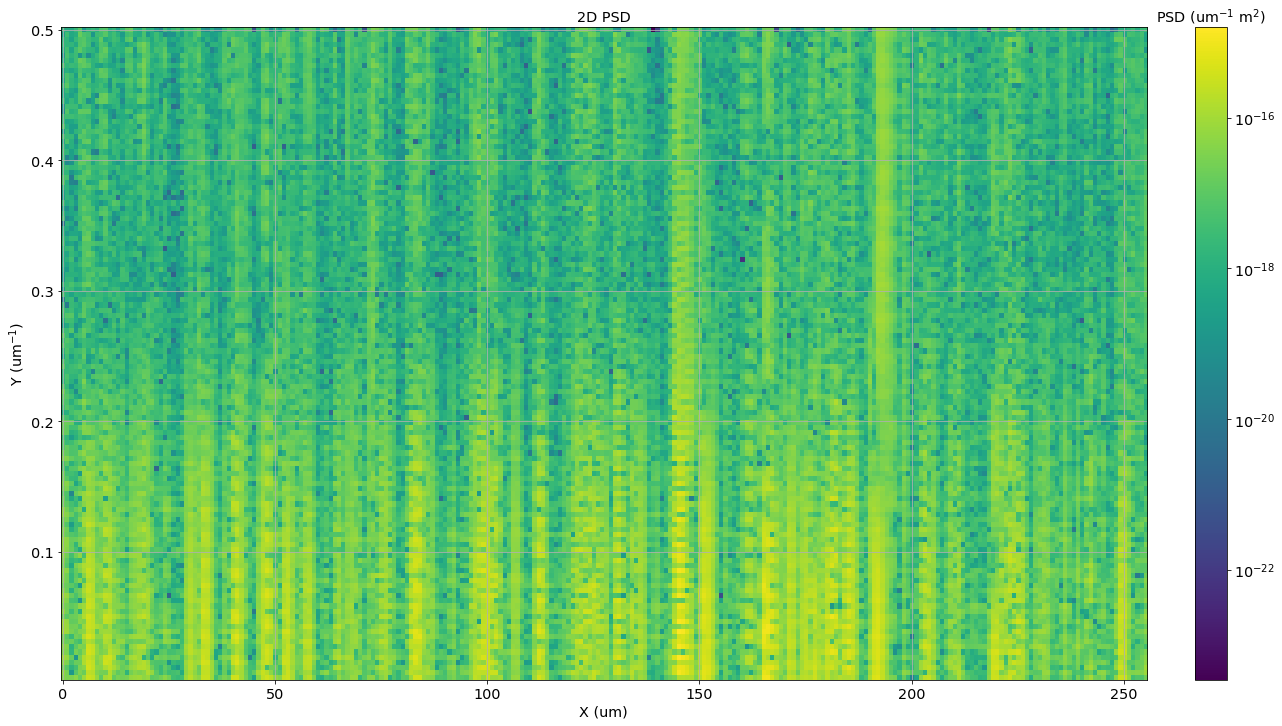

In [122]:
ps.plot()

No handles with labels found to put in legend.


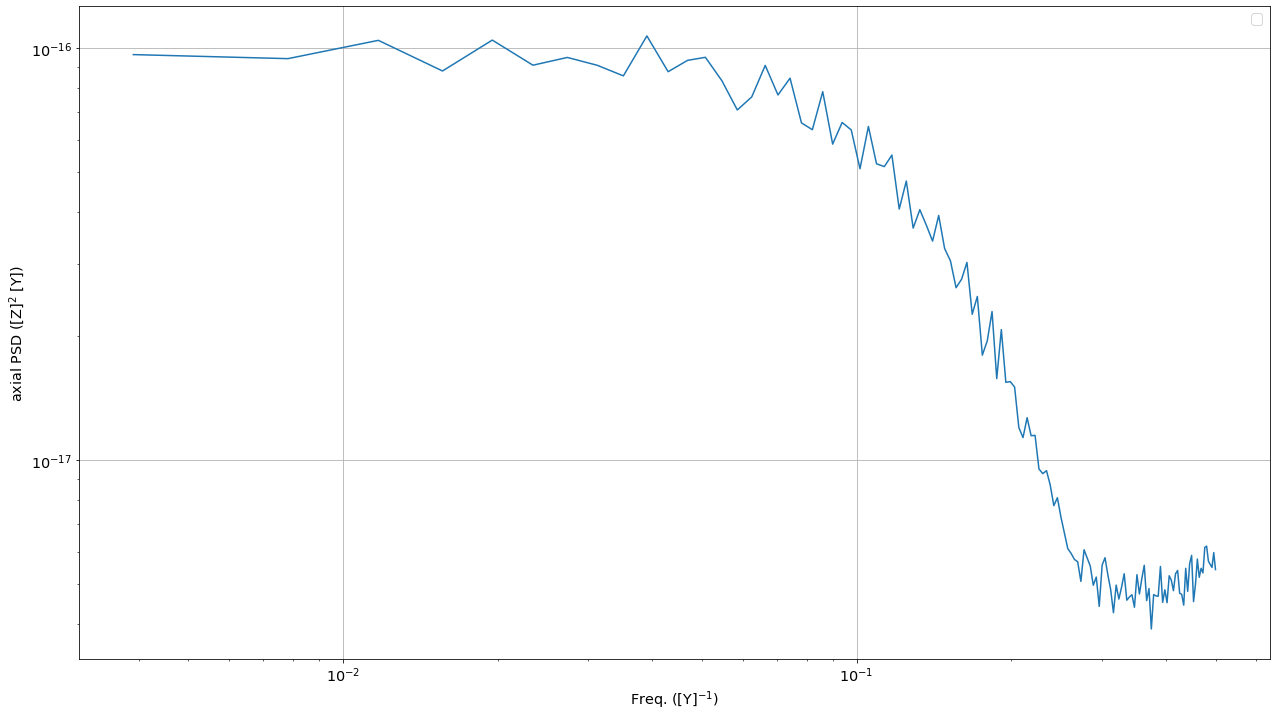

In [125]:
from pyProfile.psd import plot_psd

plot_psd(*ps.avgpsd())

## Gallery

Applicable cases in my experience: 
    
* Batch extraction of regions, points or profiles from data, calculation of derived quantities and analysis/visualization as series (e.g. time evolution, thermal and environmental effects). 
* Best fit of a surface by scaling of another surface (e.g thin films stress), or combination of multiple ones (e.g.: summing deformations);.
* Comparison of two different surface maps with different sampling or registration;
* Combination and stitching of data larger than a single field. (e.g. uniformity obtained by small maps on larger maps).
* Building data pipelines, or in general all cases where a complex analysis on data needs to be repeated multiple times.
* Integration with existing specific code or analysis tools.

## Fit of Stress in thin films 

<img src='material/Demo/best_fit_VM.jpg'>

## Alignment of Images with different instruments

<img src='material/Demo/diff_cghpng.png'>

## Fit of Stress in thin films 

<img src='material/Demo/slope.png'>

## Fit of Stress in thin films 

<img src='material/Demo/best_fit_VM.jpg'>

## Results of Machining and Optical Performance Simulation

<table><tr><td width='25%'><img src='material/Demo/align.jpg'><td width='25%'><img src='material/Demo/PSD.jpg'></td><td width='25%'><img src='material/Demo/PSF.jpg'></td></tr></table>


## Extraction of Statistics

<img src='material/Demo/pandas.jpg'>

## Status of the project

* First public appearence, until now a single person project.
* I constantly work on it, as I use it. So this is what dictate my direction, but it can change on user feedback. 
* Of course, first thing to make it usable is to have documentation.
* Documentation is available for many functions as docstrings (Python way of automatically generating documentation from comments in code), but is not uniform and not available as external documentation. 
* Installation can be (easily) performed manually.   


# Contacts

Project page (it's inside a slightly bigger project, and unfortunately there is a name conflict with other libraries): 

    https://github.com/vincenzooo/pyXTel

My email: vincenzo.cotroneo@inaf.it
    
# Acknowledgements


Thanks to my current Institution (Osservatorio Astronomico di Brera, Merate, IT) and the previous one (Center for Astrophysics | Harvard & Smithsonian, Cambridge, MA, USA).

Thanks to the wonderful Python community.